<a href="https://colab.research.google.com/github/Felizlin94/ML-Prediction-of-quality-of-Wine/blob/main/%E7%B4%85%E9%85%92%E5%93%81%E8%B3%AA%E5%88%86%E9%A1%9E%E9%A0%90%E6%B8%AC_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML

df = pd.read_csv('https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv')

def primitive_data_exploration(df):
    # Descriptive statistics
    description = df.describe()
    display(HTML("<h3>Description:</h3>"))
    print(description)

    # Check information of rows and columns
    display(HTML("<h3>Info df:</h3>"))
    print(df.info())

    # Look for missing values in the dataset
    missing_values = df.isnull().sum()
    display(HTML("<h3>Missing values:</h3>"))
    print(missing_values)


primitive_data_exploration(df)

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


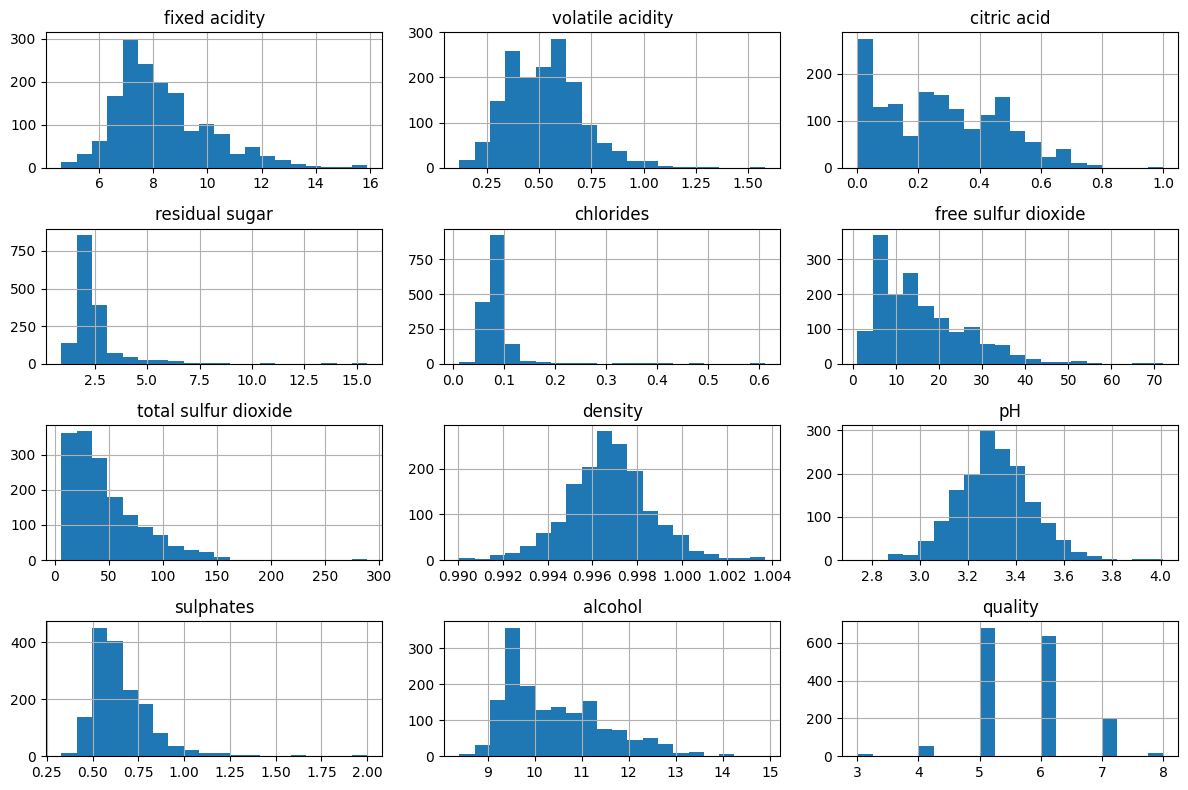

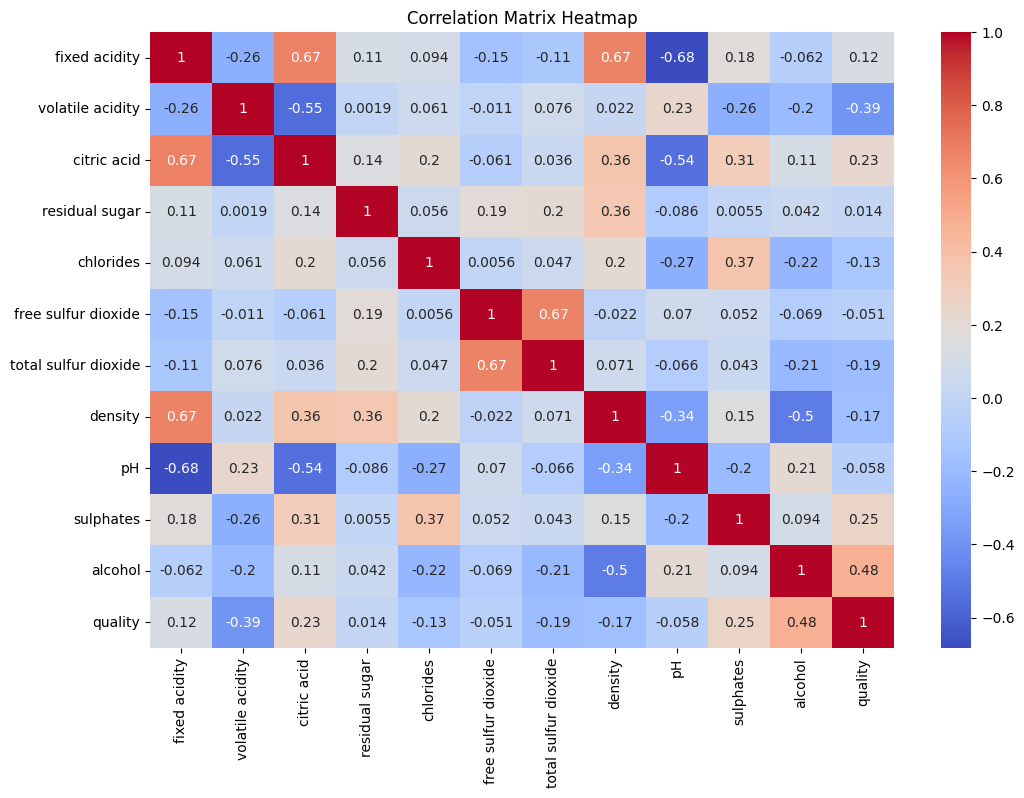

In [ ]:
def eda(df):
    # Visualizing the distribution of each feature
    display(HTML("<h3>Feature Distributions:</h3>"))
    df.hist(bins=20, figsize=(12, 8))
    plt.tight_layout()
    plt.show()

    # Correlation matrix and heatmap
    correlation_matrix = df.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix Heatmap')
    plt.show()

    # Pairplot to visualize relationships between features
    display(HTML("<h3>Pairplot of Features:</h3>"))
    sns.pairplot(df, diag_kind='hist')
    plt.show()

    # Checking the distribution of the target variable 'quality'
    display(HTML("<h3>Quality Distribution:</h3>"))
    sns.countplot(x='quality', data=df)
    plt.title('Quality Distribution')
    plt.show()

    # Boxplot to see the distribution of features with respect to the target variable 'quality'
    display(HTML("<h3>Boxplot by Quality:</h3>"))
    for column in df.columns[:-1]:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x='quality', y=column, data=df)
        plt.title(f'Boxplot of {column} by Quality')
        plt.show()


eda(df)

In [18]:
df_train = df

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = df_train.drop('quality', axis = 1)
y = df_train['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
rfc = RandomForestClassifier(n_estimators=200)
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 5)
print(rfc_eval)

[0.6640625  0.6875     0.66015625 0.70703125 0.73333333]
